# Задача классификации грибов на съедобные и несъедобные

### 0. Описание задачи

Этот набор данных описывает различные физические характеристики грибов, разделённых на **съедобные** (*e - edible*) и **ядовитые** (*p - poisonous*). Датасет насчитывает 8124 образца, соответствующих 23 видам грибов семейства Agaricus и Lepiota, а также 22 признака, включающие цвет, запах, среду обитания гриба и проч. Сведения о грибах взяты из справочника Общества Одюбона по североамериканским грибам (1981 г., G. H. Lincoff (Pres.), New York: Alfred A. Knopf).

Целью задачи является определение принадлежности гриба к одному из классов по внешним признакам. В ходе решения задачи будут использованы различные методы машинного обучения, будут сделаны выводы о целесообразности их использования в зависимости от аккуратности предсказания.

---







### 1. Чтение данных
Установим библиотеки, которые пригодятся далее для работы с данными.

In [59]:
! pip install numpy matplotlib pandas plotly seaborn scikit-learn


In [60]:
# импорт библиотек

import time
import pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline


In [61]:
# импортируем датасет с официального сайта https://www.openml.org
mushroom_dataset = fetch_openml(name='mushroom', version=1, parser='auto')


In [62]:
# Посмотрим на размеры таблицы - количество строк (каждая строка соответствует одному грибу) и количество столбцов (каждый столбец соответствует конкретному признаку)
mushroom_dataset.data.shape


(8124, 22)

In [63]:
# Выведем содержимое датасета
mushroom_dataset = mushroom_dataset.frame
mushroom_dataset


,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,e
8120,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,e
8122,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,p


In [64]:
# Выведем первые 15 строк датасета
mushroom_dataset.head(15)


,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
5,x,y,y,t,a,f,c,b,n,e,...,w,w,p,w,o,p,k,n,g,e
6,b,s,w,t,a,f,c,b,g,e,...,w,w,p,w,o,p,k,n,m,e
7,b,y,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,s,m,e
8,x,y,w,t,p,f,c,n,p,e,...,w,w,p,w,o,p,k,v,g,p
9,b,s,y,t,a,f,c,b,g,e,...,w,w,p,w,o,p,k,s,m,e


In [65]:
# Выведем последние 15 строк датасета
mushroom_dataset.tail(15)


,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
8109,b,s,w,f,n,f,w,b,w,e,...,w,w,p,w,t,p,w,n,g,e
8110,x,s,n,f,n,a,c,b,o,e,...,o,o,p,o,o,p,n,v,l,e
8111,k,s,w,f,n,f,w,b,p,e,...,w,w,p,w,t,p,w,n,g,e
8112,k,s,n,f,n,a,c,b,o,e,...,o,o,p,n,o,p,b,v,l,e
8113,k,y,e,f,y,f,c,n,b,t,...,p,p,p,w,o,e,w,v,d,p
8114,f,y,c,f,m,a,c,b,y,e,...,c,c,p,w,n,n,w,c,d,p
8115,x,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,o,v,l,e
8116,k,y,n,f,s,f,c,n,b,t,...,p,w,p,w,o,e,w,v,l,p
8117,k,s,e,f,y,f,c,n,b,t,...,p,w,p,w,o,e,w,v,d,p
8118,k,y,n,f,f,f,c,n,b,t,...,p,w,p,w,o,e,w,v,d,p


In [66]:
# Выведем имена столбцов (признаков)
columns = mushroom_dataset.columns.to_list()
print(len(columns))
for column in columns:
  print(column)


23
cap-shape
cap-surface
cap-color
bruises%3F
odor
gill-attachment
gill-spacing
gill-size
gill-color
stalk-shape
stalk-root
stalk-surface-above-ring
stalk-surface-below-ring
stalk-color-above-ring
stalk-color-below-ring
veil-type
veil-color
ring-number
ring-type
spore-print-color
population
habitat
class


**Описание признаков и их возможных значений**
1. **cap-shape** (форма шляпки): bell=b (колоколчатая), conical=c (коническая), convex=x (выпуклая), flat=f (плоская), knobbed=k (бугристая), sunken=s (впалая)


2. **cap-surface** (поверхность шляпки): fibrous=f (волокнистая), grooves=g (с выемками), scaly=y (чешуйчатая), smooth=s (гладкая)


3. **cap-color** (цвет шляпки): brown=n (коричневый), buff=b (желтовато-коричневый), cinnamon=c (светло-коричневый), gray=g (серый), green=r (зеленый), pink=p (розовый), purple=u (фиолетовый), red=e (красный), white=w (белый), yellow=y (желтый)


4. **bruises** (синяки): bruises=t (есть), no=f (нет)


5. **odor** (запах): almond=a (миндальный), anise=l (анисовый), creosote=c (креозотовый), fishy=y (рыбный), foul=f (неприятный, противный), musty=m (затхлый), none=n (никакой), pungent=p (резкий, едкий), spicy=s (острый, пряный)


6. **gill-attachment** (форма пластин): attached=a (прикрепленная), descending=d (нисходящая), free=f (свободная), notched=n (зубчатая)


7. **gill-spacing** (расположение пластин): close=c (близкое), crowded=w (плотное, тесное), distant=d (далекое)


8. **gill-size** (размер пластин): broad=b (широкий), narrow=n (узкий)


9. **gill-color** (цвет пластин): black=k (черный), brown=n (коричневый), buff=b (желтовато-коричневый), chocolate=h (шоколадный), gray=g (серый), green=r (зеленый), orange=o (оранжевый), pink=p (розовый), purple=u (фиолетовый), red=e (красный), white=w (белый), yellow=y (желтый)





10. **stalk-shape** (форма ножки): enlarging=e (расширяющаяся), tapering=t (сужающаяся)


11. **stalk-root** (корень ножки): bulbous=b (луковичный), club=c (клубчатый), cup=u (чашевидный), equal=e (равный), rhizomorphs=z (ризоморфный), rooted=r (укореняющийся), missing=? (отсутствует)


12. **stalk-surface-above-ring** (поверхность ножки выше кольца): fibrous=f (волокнистая), scaly=y (чешуйчатая), silky=k (шелковистая), smooth=s (гладкая)


13. **stalk-surface-below-ring** (поверхность ножки ниже кольца): fibrous=f (волокнистая), scaly=y (чешуйчатая), silky=k (шелковистая), smooth=s (гладкая)


14. **stalk-color-above-ring** (цвет ножки выше кольца): brown=n (коричневый), buff=b (желтовато-коричневый), cinnamon=c (светло-коричневый), gray=g (серый), orange=o (оранжевый), pink=p (розовый), red=e (красный), white=w (белый), yellow=y (желтый)


15. **stalk-color-below-ring** (цвет ножки ниже кольца): brown=n (коричневый), buff=b (желтовато-коричневый), cinnamon=c (светло-коричневый), gray=g (серый), orange=o (оранжевый), pink=p (розовый), red=e (красный), white=w (белый), yellow=y (желтый)


16. **veil-type** (тип вуали): partial=p (частичная), universal=u (полная)


17. **veil-color** (цвет вуали): brown=n (коричневая), orange=o (оранжевая), white=w (белая), yellow=y (желтая)


18. **ring-number** (количество колец): none=n (ни одного), one=o (одно), two=t (два)


19. **ring-type** (тип кольца): cobwebby=c (паутинистое), evanescent=e (еле заметное), flaring=f (расширяющееся книзу), large=l (большое), none=n (никакое), pendant=p (кулонообразное), sheathing=s (обволакивающее), zone=z (зональное)


20. **spore-print-color** (цвет спор): black=k (черный), brown=n (коричневый), buff=b (желтовато-коричневый), chocolate=h (шоколадный), green=r (зеленый), orange=o (оранжевый), purple=u (фиолетовый), white=w (белый), yellow=y (желтый)


21. **population** (тип популяции): abundant=a (обильная), clustered=c (скоплениями), numerous=n (многочисленная), scattered=s (рассеянная), several=v (несколько), solitary=y (одиночная)


22. **habitat** (среда обитания): grasses=g (трава), leaves=l (листья), meadows=m (луга), paths=p (дороги, тропинки), urban=u (город), waste=w (отходы), woods=d (леса)

23. **class** (класс): edible=e (съедобные), poisonous=p (ядовитые)

In [67]:
# Выведем информацию по датасету
mushroom_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   cap-shape                 8124 non-null   category
 1   cap-surface               8124 non-null   category
 2   cap-color                 8124 non-null   category
 3   bruises%3F                8124 non-null   category
 4   odor                      8124 non-null   category
 5   gill-attachment           8124 non-null   category
 6   gill-spacing              8124 non-null   category
 7   gill-size                 8124 non-null   category
 8   gill-color                8124 non-null   category
 9   stalk-shape               8124 non-null   category
 10  stalk-root                5644 non-null   category
 11  stalk-surface-above-ring  8124 non-null   category
 12  stalk-surface-below-ring  8124 non-null   category
 13  stalk-color-above-ring    8124 non-null   catego

Далее выведем описательную статистику по датасету: количество значений у каждого признака, количество уникальных значений, наиболее частое значение и количество его появлений в таблице.

In [68]:
mushroom_dataset.describe()


,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,...,w,w,p,w,o,p,w,v,d,e
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


Проанализировав полученную таблицу, можно заметить, что в столбце "veil-type" присутствует только одно уникальное значение, следовательно, этот столбец не несёт полезной нагрузки для нашей задачи и в дальнейшем может быть удалён.

### 3. Визуализация данных

Начнём с визуализации данных по классовому признаку и построим гистограмму грибов по их съедобности.


<Axes: xlabel='class', ylabel='count'>

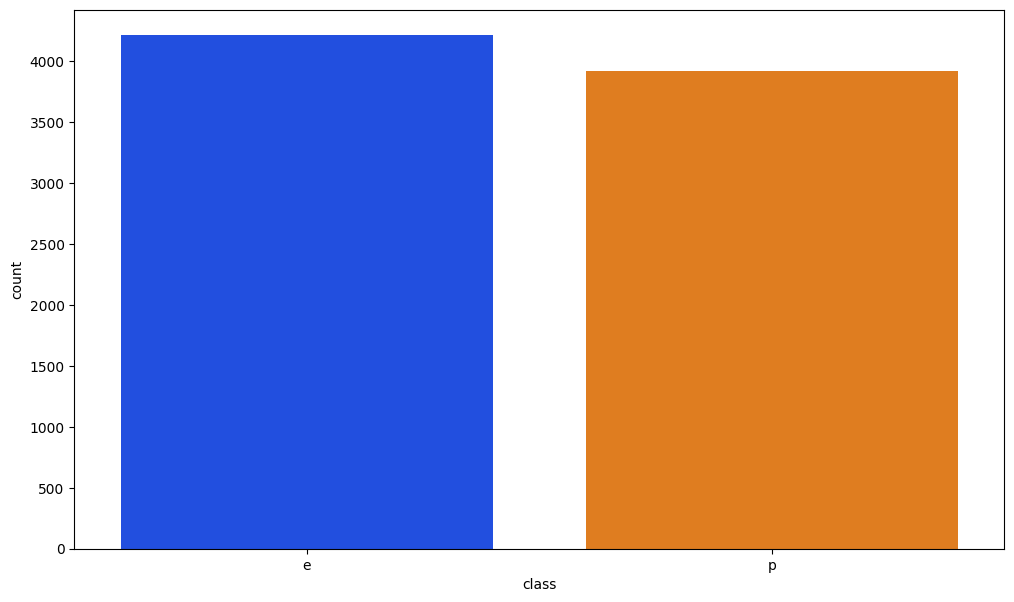

In [69]:
plt.figure(figsize=(12, 7))
sns.countplot(data=mushroom_dataset, x='class', hue='class', palette='bright')


Синим цветом обозначены съедобные грибы, оранжевым - несъедобные. Съедобных грибов в датасете немного больше, чем несъедобных

Теперь рассмотрим как съедобные и несъедобные грибы распределены по значениям некоторых фиксированных признаков, например, запах, среда обитания, популяция.


Построим гистограмму, показывающую количество съедобных и несъедобных грибов по их запаху

<Axes: xlabel='odor', ylabel='count'>

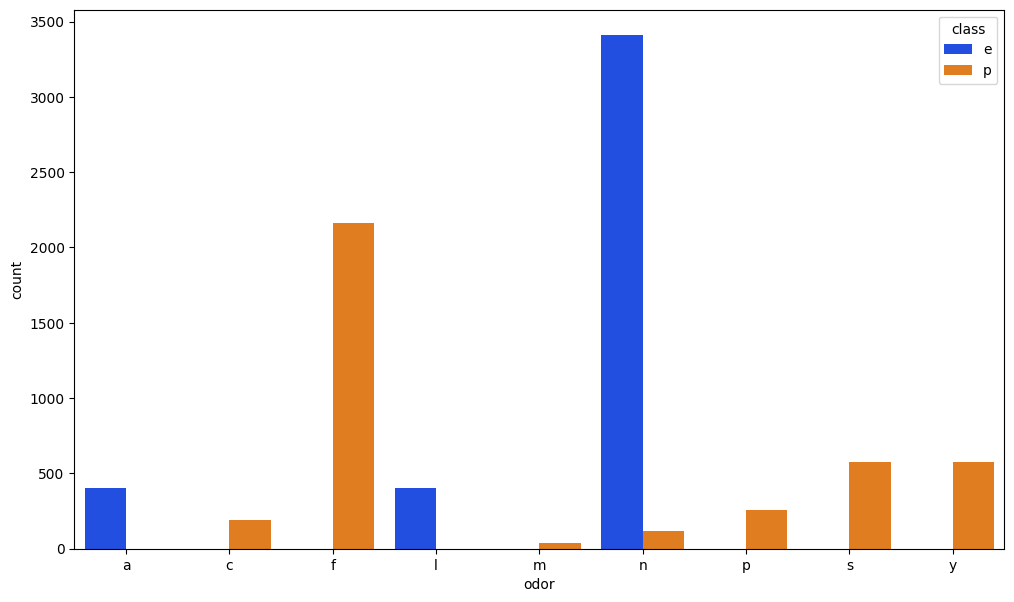

In [70]:
plt.figure(figsize=(12, 7))
sns.countplot(data=mushroom_dataset, x='odor', hue='class', palette='bright')


Как мы можем заметить, грибы с креозотовым, очень неприятным, затхлым, резким, пряным или рыбным запахов всегда относятся к несъедобным, в то время как грибы с миндальным или анисовым запахом всегда относятся к съедобным. Что касается грибов без запаха, то большая их часть является съедобной, но встречаются также и несъедобные грибы, которые не имеют запаха

Построим гистограмму, показывающую количество съедобных и несъедобных грибов по признаку популяции

<Axes: xlabel='population', ylabel='count'>

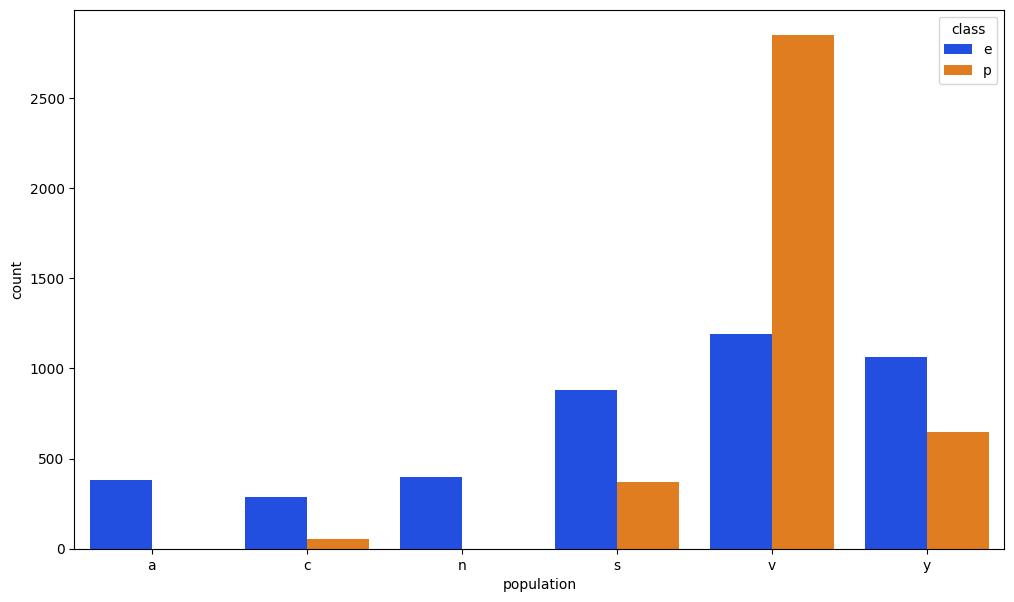

In [71]:
plt.figure(figsize=(12, 7))
sns.countplot(data=mushroom_dataset, x='population', hue='class', palette='bright')


Из гистограммы видно, что почти все растущие обильно (abundant=a) и многочисленно (numerous=n) грибы относятся к съедобным, также съедобных грибов больше среди сгруппированных (clustered=c), разбросанных (scattered=s) и одиноко растущих (solitary=y). Значительно больше несъедобных грибов только среди популяции со значением "несколько" (several=v).

Теперь посмотрим, как грибы распределены по признаку "среда обитания"

<Axes: xlabel='habitat', ylabel='count'>

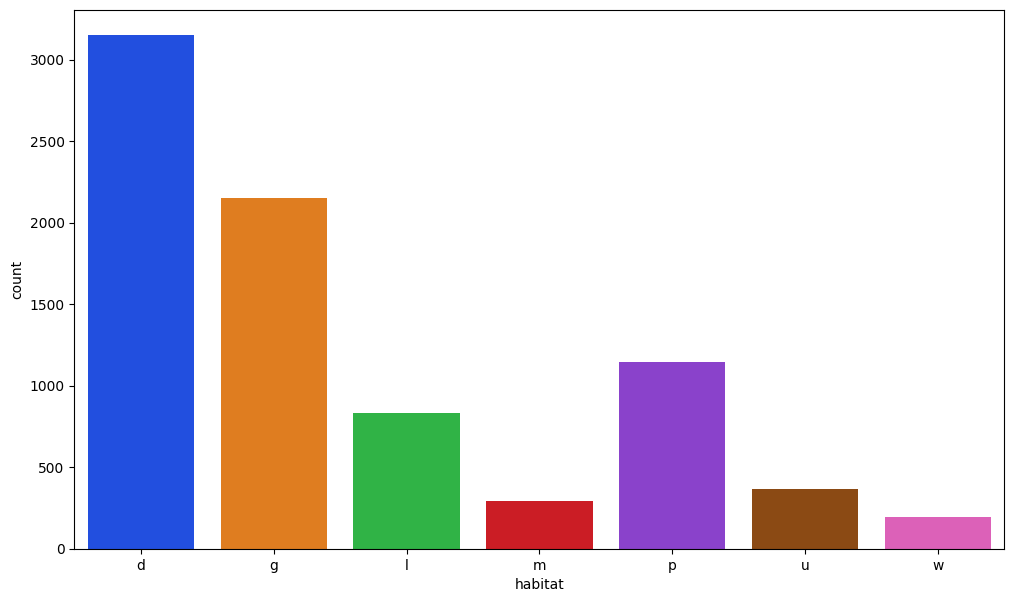

In [72]:
plt.figure(figsize=(12, 7))
sns.countplot(data=mushroom_dataset, x='habitat',
              hue="habitat", palette='bright')


Большая часть грибов из набора данных обитает в лесах или в траве. Чаще всего грибы можно встретить в лесу, а реже всего - в отходах.

Для признаков популяция и среда обитания построим таблицу сопряжённости и представим её в виде тепловой карты. Таблица сопряженности показывает частоту или долю комбинаций значений категориальных признаков в данных. Это помогает увидеть, какие категории чаще или реже встречаются вместе. На тепловой карте значения визуализируются цветами от светлых - к тёмным по увеличению частоты количества искомых комбинаций.


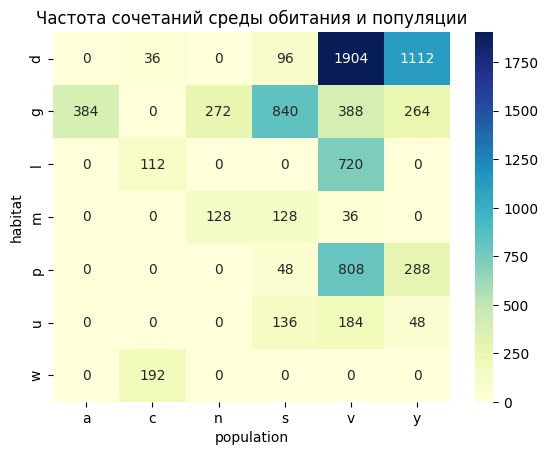

In [73]:
cross_tab = pandas.crosstab(mushroom_dataset['habitat'], mushroom_dataset['population'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Частота сочетаний среды обитания и популяции')
plt.show()

Из тепловой карты таблицы сопряжённости видно, что большинство грибов, обитающих в лесу и на дорогах/тропинках принадлежат к категориям several и solitary. Наиболее равномерно по видам популяции распределены грибы, обитающие в траве, в то время как грибы, обитающие в мусоре, растут только группами.  

### 4. Обработка пропущенных значений

In [74]:
# Проверим каждый столбец на наличие пропущенных значений
mushroom_dataset.isnull().sum()


,0
cap-shape,0
cap-surface,0
cap-color,0
bruises%3F,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0
stalk-shape,0


В столбце "stalk-root" обнаружилось 2480 пропущенных значений. Так как остальные признаки не содержат пропусков, а попытки заполнить пропущенные значения могут привести к искажению данных, выгоднее всего - удалить данный столбец. Здесь же удалим столбец "veil-type" из-за описанных ранее причин (единственное уникальное значение).

In [75]:
mushroom_dataset = mushroom_dataset.drop(columns=['stalk-root'], axis=1)
mushroom_dataset = mushroom_dataset.drop(columns=['veil-type'], axis=1)


In [76]:
# Повторим проверку на наличие пропущенных значений, заодно убедимся, что столбцов стало на 2 меньше.
mushroom_dataset.isnull().sum()


,0
cap-shape,0
cap-surface,0
cap-color,0
bruises%3F,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0
stalk-shape,0


Пропущенных значений больше нет.


### 5. Обработка категориальных признаков

Все признаки в датасете категориальные, поэтому для подготовки данных к обучению была выполнена кодировка категориальных признаков с помощью LabelEncoder из scikit-learn.
Каждый уникальный категориальный признак был преобразован в числовое значение.

Такой подход позволяет моделям машинного обучения работать с данными в числовом формате.
В данной задаче это допустимо, поскольку используются модели, нечувствительные к порядку категорий.

In [77]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
mushroom_dataset_new = mushroom_dataset.copy()
for col in mushroom_dataset_new.columns:
    mushroom_dataset_new[col] = label_encoder.fit_transform(
        mushroom_dataset_new[col])
mushroom_dataset_new.head()


,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,2,1,4,2,3,5,1
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,2,1,4,3,2,1,0
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,2,1,4,3,2,3,0
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,2,1,4,2,3,5,1
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,2,1,0,3,0,1,0


Теперь, поскольку все признаки стали числовыми, мы можем построить корреляционную матрицу

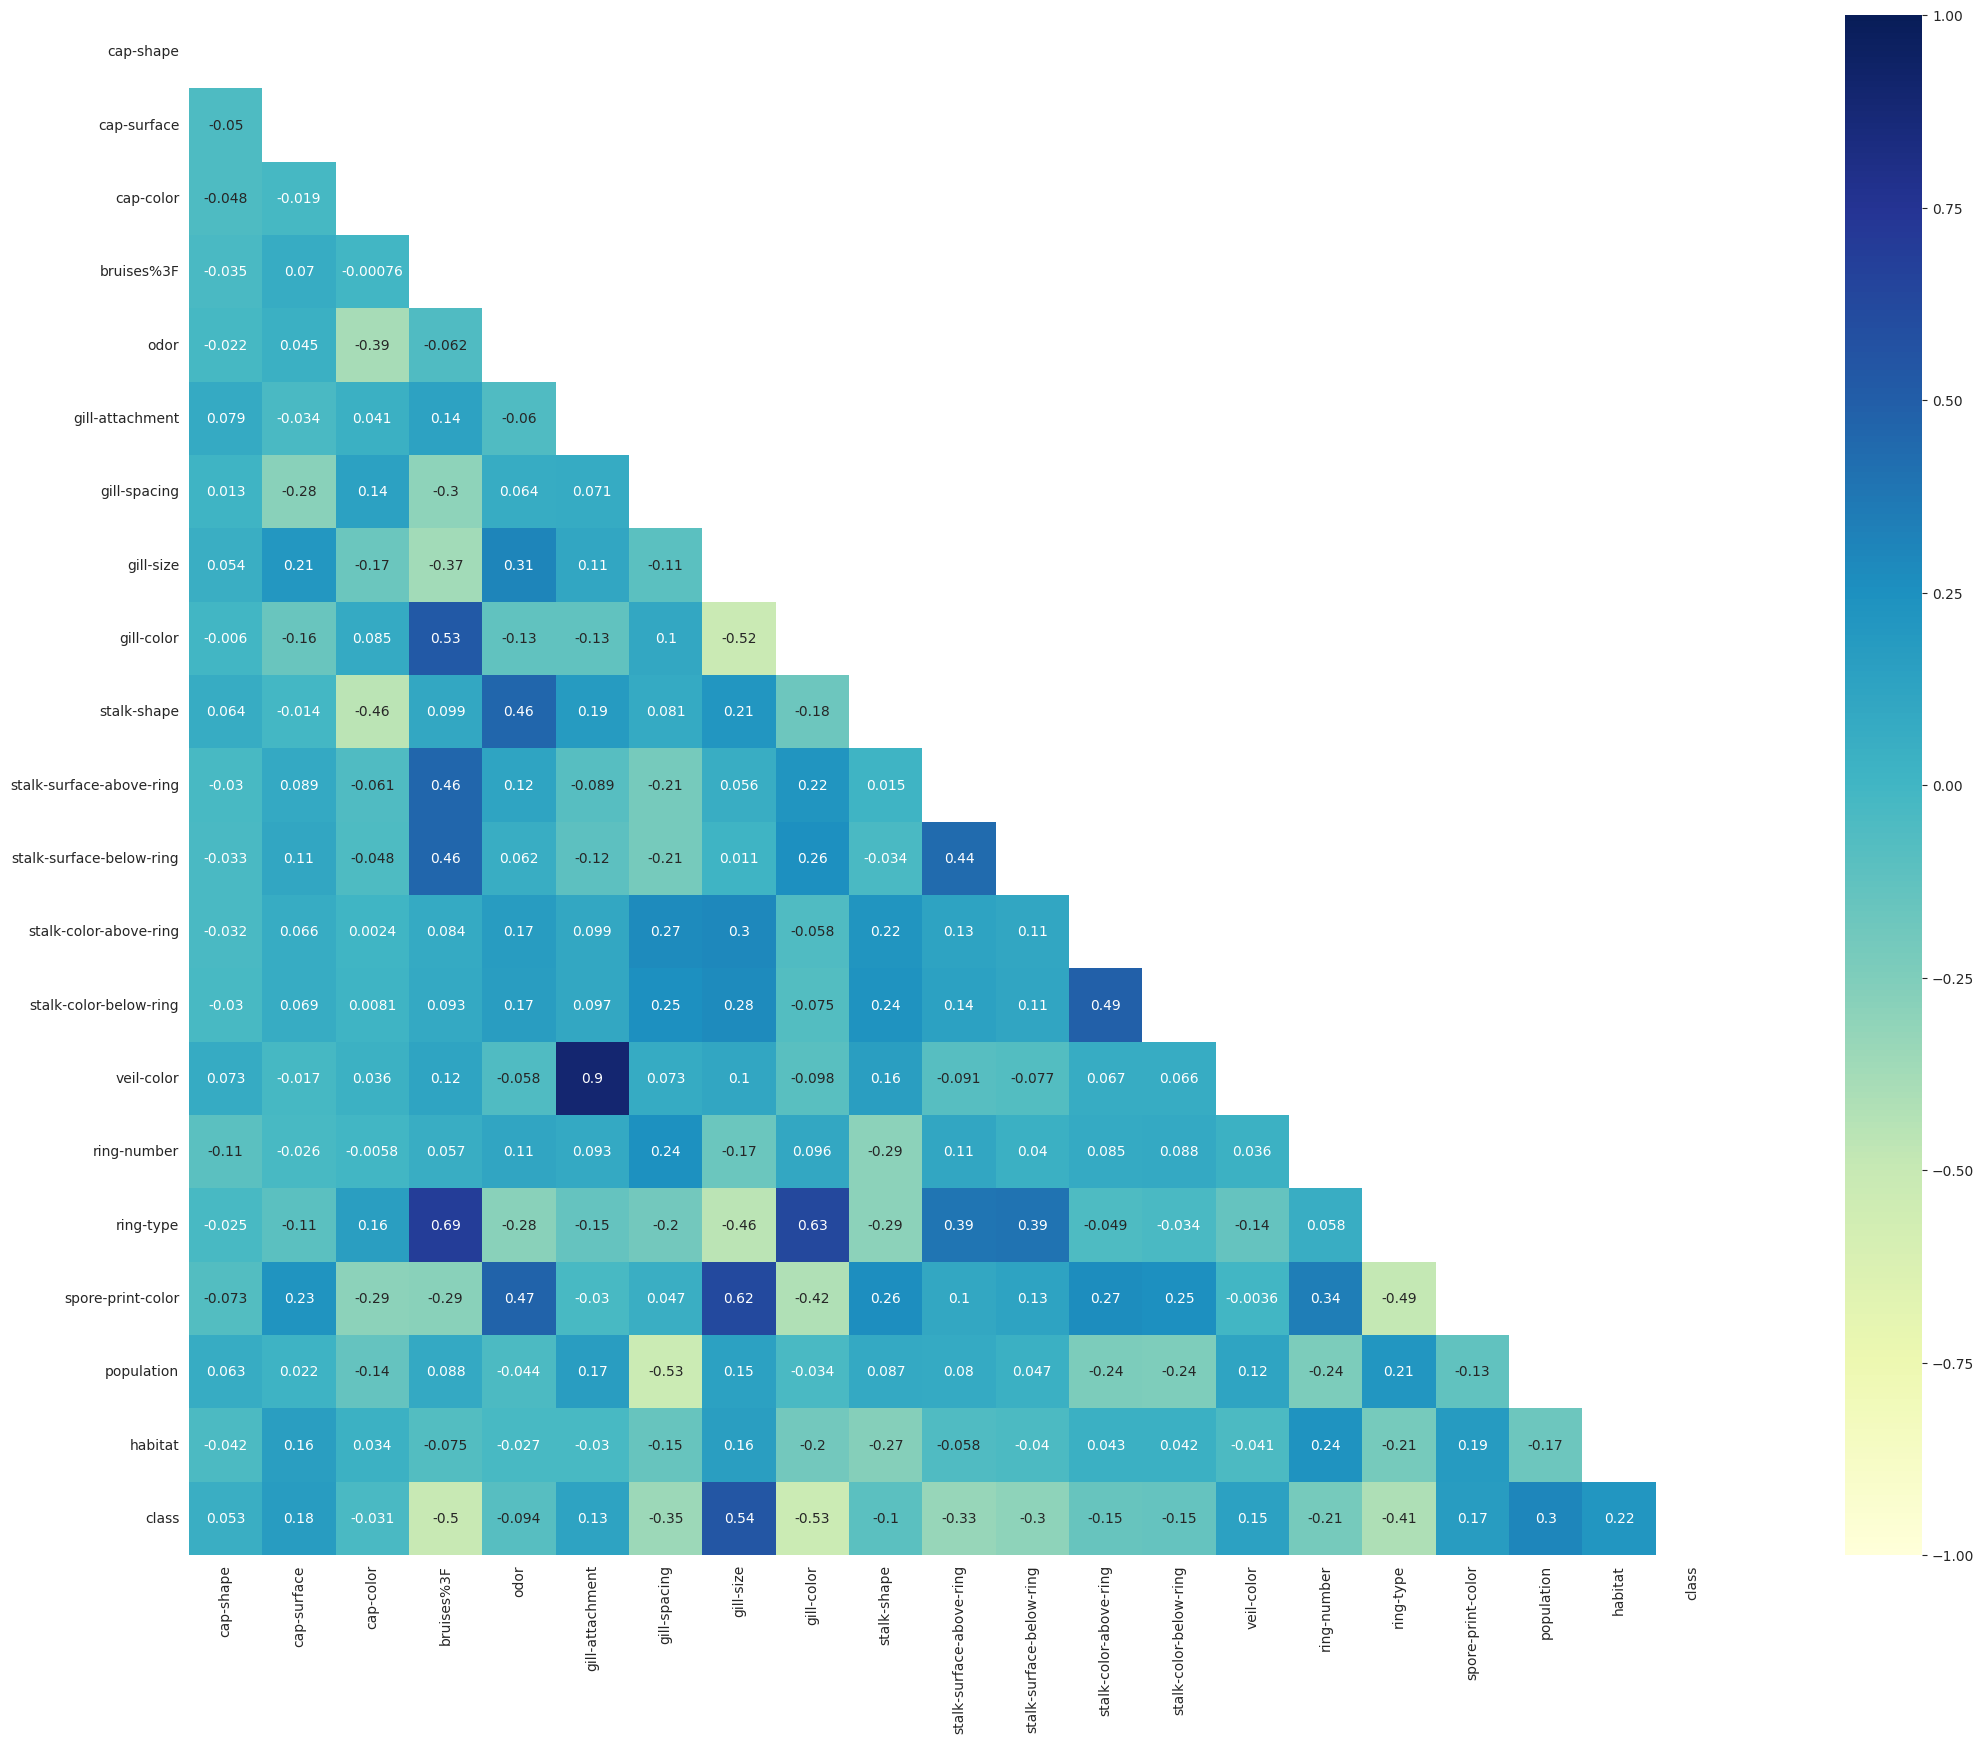

In [78]:
corr_matrix = mushroom_dataset_new.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(30, 20))
    sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap="YlGnBu",
                annot=True, mask=mask, square=True)


Мы можем заметить, что в целом корреляция между признаками довольно слабая, однако есть признаки, между которыми относительно сильная корреляция. Самая сильная корреляция наблюдается между признаками "veil-color" и "gill-attachment".

С целевой переменной class наиболее явно коррелирует признак "gill-size", а наибольшее "противоположное" влияние (отрицательная корреляция) на class оказывает признак "gill-color".

### 6. Нормализация

**Нормализация** — это процесс приведения числовых признаков к единому масштабу, чтобы значения разных признаков можно было корректно сравнивать и чтобы модели, чувствительные к масштабу данных, работали стабильнее.

В этом наборе данных все признаки категориальные, они описывают качественные характеристики грибов — форму шляпки, запах, цвет, место обитания и т.д., такие признаки не обладают метрическим смыслом, поэтому **нормализация не требуется**.

### 2. Разбиение данных на обучающую и тестовую выборки

Для обучения и тестирования модели данные были разделены в соотношении 80% на 20%.
Это обеспечивает достаточный объём данных для обучения (примерно 6500 объектов) и репрезентативную тестовую выборку (примерно 1600 объектов). Такое разделение позволяет корректно оценить качество модели без потери статистической значимости.

In [79]:
from sklearn.model_selection import train_test_split
X = mushroom_dataset_new.drop('class', axis=1)
y = mushroom_dataset_new['class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


### 7-8. Модель k ближайших соседей. Выбор оптимального параметра. Матрицы рассоглсования.


Для модели k ближайших соседей (kNN) была проведена проверка зависимости точности от количества соседей k в диапазоне   1–30.

In [80]:
from sklearn.neighbors import KNeighborsClassifier

accuracy_list_train = []
accuracy_list_test = []
for i in range(1, 31):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train, y_train)

    accuracy_train = round(KNN.score(X_train, y_train)*100, 4)
    accuracy_list_train.append(accuracy_train)

    accuracy_test = round(KNN.score(X_test, y_test)*100, 4)
    accuracy_list_test.append(accuracy_test)


Построим график Accuracy на обучающей выборке

Text(0, 0.5, 'Accuracy on train, %')

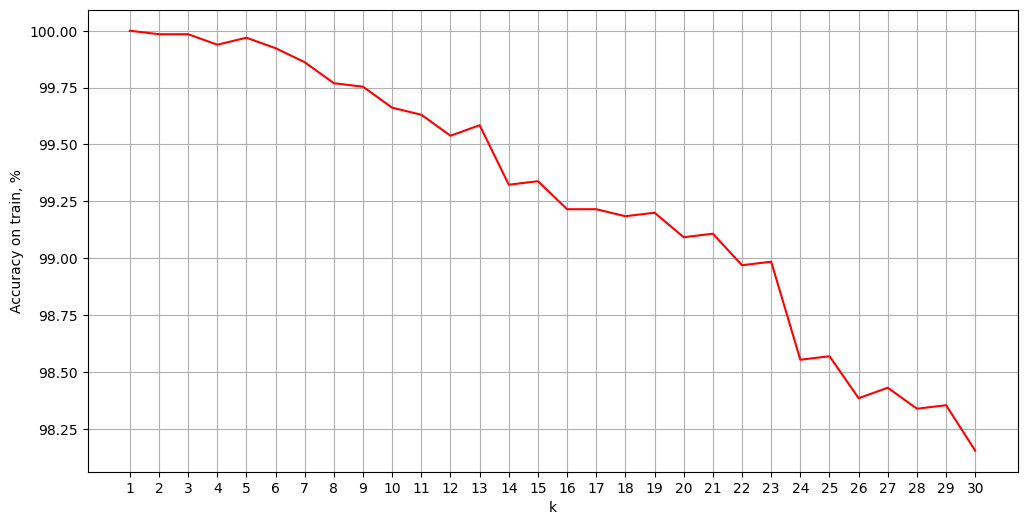

In [81]:
k = np.arange(1, 31)
plt.figure(figsize=(12, 6))
plt.plot(k, accuracy_list_train, 'red')
plt.xlabel('k')
plt.xticks(np.arange(min(k), max(k)+1, 1.0))
plt.grid(which='major')
plt.ylabel('Accuracy on train, %')


Как мы можем заметить, лучший результат достигается при k = 1

Теперь построим график Accuracy на тестовой выборке

Text(0, 0.5, 'Accuracy on test, %')

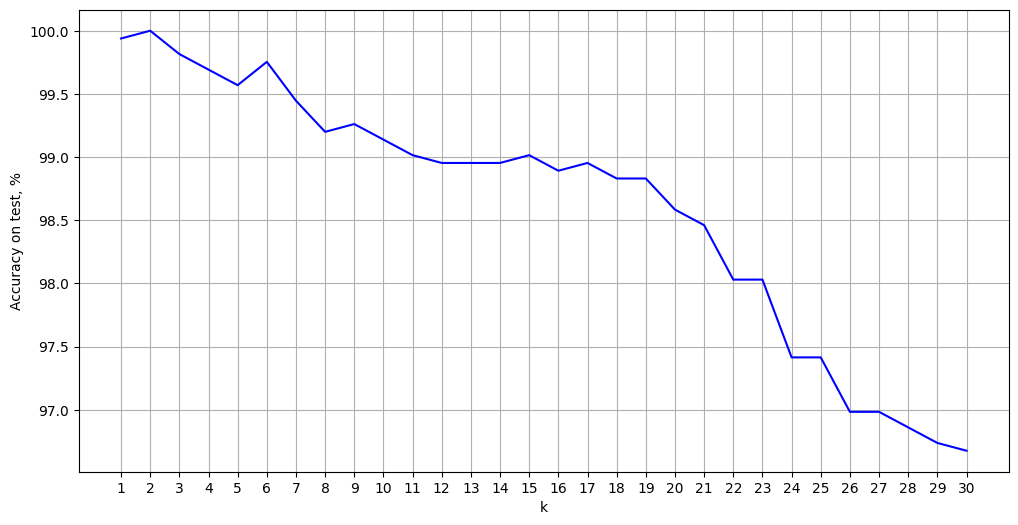

In [82]:
k = np.arange(1, 31)
plt.figure(figsize=(12, 6))
plt.plot(k, accuracy_list_test, 'blue')
plt.xlabel('k')
plt.xticks(np.arange(min(k), max(k)+1, 1.0))
plt.grid(which='major')
plt.ylabel('Accuracy on test, %')


При анализе зависимости точности модели k ближайших соседей от количества соседей k было выявлено, что наилучшие результаты достигаются при малых значениях k (1, 2). Для этих значений модель демонстрирует высокую точность как на обучающей, так и на тестовой выборке.
При увеличении числа соседей точность постепенно снижается, что указывает на ослабление чувствительности модели и тенденцию к недообучению.

Применим алгоритм ближайщих соседей при k = 2 и посмотрим, чему равно значение ошибки

In [83]:
KNN_model = KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train)

start_time = time.time()
error_train = 1 - KNN_model.score(X_train, y_train)
error_test = 1 - KNN_model.score(X_test, y_test)
end_time = time.time()
runtime = end_time - start_time

print('Error on train = ', error_train)
print('Error on test = ', error_test)
print('Runtime = ', runtime)


Error on train =  0.00015386982612708433
Error on test =  0.0
Runtime =  1.016373872756958


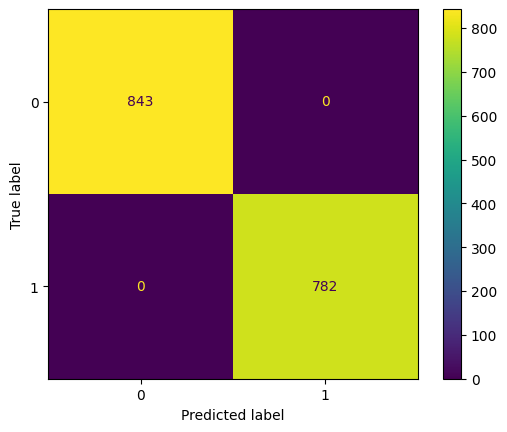

In [84]:
ConfusionMatrixDisplay.from_estimator(KNN_model, X_test, y_test)


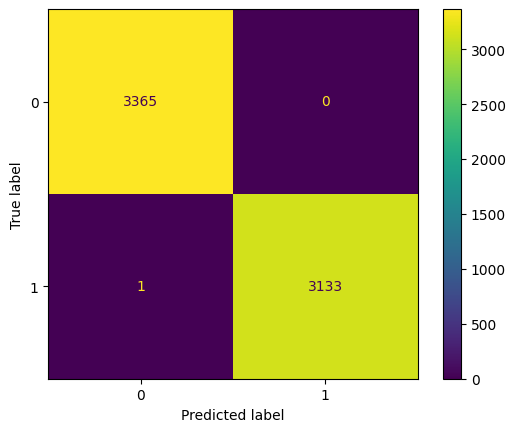

In [85]:
ConfusionMatrixDisplay.from_estimator(KNN_model, X_train, y_train)

На тестовой выборке модель сработала безошибочно, допустив одну ошибку на обучающей выборке. Из этого можно сделать вывод, что k=2 является оптимальным параметром для модели k ближайших соседей. Это связано с высокой структурированностью и чистотой исходных данных: классы грибов хорошо разделяются по признакам.